## 1. Problem Definition

An auto-dealer is a person who buys used cars, repairs or refurbishes them and then sells it to buyers in need of cars 
(cheaper than brand new cars). With the wear and tear of everyday use, the cost of car depreciates. Some cars may need extra mechanical help such as break-service, engine tune-up, battery change, improving air-conditioning etc. The dealer may be able to bear the cost of such services, however, there could be services which may be costly to the dealer such as transportation cost, throw-away repair work, and market losses in reselling the vehicle etc. In such scenarios, it is important for the dealer to carefully consider the options and make informed decisions before purchasing a used car at the auction.

With a help of historical data of cars that were bought at the auction and resulted in becoming an asset/liability for the dealer, we are trying to build a machine learning model that will help the dealer to engage in careful deliberation and thoughtful consideration before procuring a used car from the auction. Specifically, we are trying to classify whether the car would be a liability/kick (1) or an asset (0) for the dealer. 

Source of the data : https://www.kaggle.com/datasets/ulrikthygepedersen/car-kick

The dataset consists of 67k rows and 31 columns. 


|    	|                                     	|                                                                                                        	|   	|   	|
|----	|-------------------------------------	|--------------------------------------------------------------------------------------------------------	|---	|---	|
| 1  	| 'Class'                             	| Identifies if the kicked vehicle was an avoidable purchase                                             	|   	|   	|
| 2  	| 'PurchDate'                         	| The Date the vehicle was Purchased at Auction                                                          	|   	|   	|
| 3  	| 'Auction'                           	| Auction provider at which the vehicle was purchased                                                    	|   	|   	|
| 4  	| 'VehYear'                           	| The manufacturer's year of the vehicle                                                                 	|   	|   	|
| 5  	| 'VehicleAge'                        	| The Years elapsed since the manufacturer's year                                                        	|   	|   	|
| 6  	| 'Make'                              	| Vehicle Manufacturer                                                                                   	|   	|   	|
| 7  	| 'Model'                             	| Vehicle Model                                                                                          	|   	|   	|
| 8  	| 'Trim'                              	| Vehicle Trim Level                                                                                     	|   	|   	|
| 9  	| 'SubModel'                          	| Vehicle Submodel                                                                                       	|   	|   	|
| 10 	| 'Color'                             	| Vehicle Color                                                                                          	|   	|   	|
| 11 	| 'Transmission'                      	| Vehicles transmission type (Automatic, Manual)                                                         	|   	|   	|
| 12 	| 'WheelTypeID'                       	| The type id of the vehicle wheel                                                                       	|   	|   	|
| 13 	| 'WheelType'                         	| The vehicle wheel type description (Alloy, Covers)                                                     	|   	|   	|
| 14 	| 'VehOdo'                            	| The vehicles odometer reading                                                                          	|   	|   	|
| 15 	| 'Nationality'                       	| The Manufacturer's country                                                                             	|   	|   	|
| 16 	| 'Size'                              	| The size category of the vehicle (Compact, SUV, etc.)                                                  	|   	|   	|
| 17 	| 'TopThreeAmericanName'              	| Identifies if the manufacturer is one of the top three American manufacturers                          	|   	|   	|
| 18 	| 'MMRAcquisitionAuctionAveragePrice' 	| Acquisition price for this vehicle in average condition at time of purchase                            	|   	|   	|
| 19 	| 'MMRAcquisitionAuctionCleanPrice'   	| Acquisition price for this vehicle in the above Average condition at time of purchase                  	|   	|   	|
| 20 	| 'MMRAcquisitionRetailAveragePrice'  	| Acquisition price for this vehicle in the retail market in average condition at time of purchase       	|   	|   	|
| 21 	| 'MMRAcquisitonRetailCleanPrice'     	| Acquisition price for this vehicle in the retail market in above average condition at time of purchase 	|   	|   	|
| 22 	| 'MMRCurrentAuctionAveragePrice'     	| Acquisition price for this vehicle in average condition as of current day                              	|   	|   	|
| 23 	| 'MMRCurrentAuctionCleanPrice'       	| Acquisition price for this vehicle in the above condition as of current day                            	|   	|   	|
| 24 	| 'MMRCurrentRetailAveragePrice'      	| Acquisition price for this vehicle in the retail market in average condition as of current day         	|   	|   	|
| 25 	| 'MMRCurrentRetailCleanPrice'        	| Acquisition price for this vehicle in the retail market in above average condition as of current day   	|   	|   	|
| 26 	| 'BYRNO'                             	| Unique number assigned to the buyer that purchased the vehicle                                         	|   	|   	|
| 27 	| 'VNZIP1'                            	| Zipcode where the car was purchased                                                                    	|   	|   	|
| 28 	| 'VNST'                              	| State where the the car was purchased                                                                  	|   	|   	|
| 29 	| 'VehBCost'                          	| Acquisition cost paid for the vehicle at time of purchase                                              	|   	|   	|
| 30 	| 'IsOnlineSale'                      	| Identifies if the vehicle was originally purchased online                                              	|   	|   	|
| 31 	| 'WarrantyCost'                      	| Warranty price (term=36month and millage=36K)                                                          	|   	|   	|

## Importing libraries

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from plotly.graph_objs import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
main_df = pd.read_csv("car_kick.csv")

Saving car_kick.csv to car_kick.csv


In [ ]:
kick_df = main_df.copy()
kick_df.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,Class
0,1.289952e+09,2006.0,4,51954.0,6197.0,7062.0,9605.0,10426.0,5341.0,6351.0,...,2.0,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1.242691e+09,2005.0,4,89127.0,3688.0,4783.0,4483.0,5666.0,3688.0,4783.0,...,2.0,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1.248221e+09,2006.0,3,71271.0,6897.0,8449.0,7949.0,9625.0,6868.0,8549.0,...,1.0,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1.285718e+09,2008.0,2,83338.0,7878.0,8925.0,11723.0,13026.0,7801.0,8704.0,...,2.0,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1.237334e+09,2007.0,2,58698.0,8800.0,10091.0,10004.0,11398.0,7355.0,8543.0,...,1.0,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0


In [ ]:
kick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67211 entries, 0 to 67210
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          67211 non-null  float64
 1   VehYear                            67211 non-null  float64
 2   VehicleAge                         67211 non-null  int64  
 3   VehOdo                             67211 non-null  float64
 4   MMRAcquisitionAuctionAveragePrice  67211 non-null  float64
 5   MMRAcquisitionAuctionCleanPrice    67211 non-null  float64
 6   MMRAcquisitionRetailAveragePrice   67211 non-null  float64
 7   MMRAcquisitonRetailCleanPrice      67211 non-null  float64
 8   MMRCurrentAuctionAveragePrice      67211 non-null  float64
 9   MMRCurrentAuctionCleanPrice        67211 non-null  float64
 10  MMRCurrentRetailAveragePrice       67211 non-null  float64
 11  MMRCurrentRetailCleanPrice         67211 non-null  flo

The dataset does not have any Null values. We can go ahead expploring the dataset

## 1. Data Exploration, Visualization and Processing

In this step of the project , we are exploring the dataset to understand data distributions within categories, detecting patterns and relationships with the target variable - 'Class' in our case and also identifying features that are important for the analysis.

#### Exploring the Purchase date and vehicle year columns and identifying relationship between the variables

In [ ]:
## Converting PurchDate into relevant format and checking significance of the variable
kick_df['Purchase_date'] = pd.to_datetime(kick_df['PurchDate'], unit='s')

## exploring Purchase_date, VehYear
vehicle_df = kick_df.loc[:,['Purchase_date', 'VehYear','VehicleAge' ]]
vehicle_df.head()

,Purchase_date,VehYear,VehicleAge
0,2010-11-17,2006.0,4
1,2009-05-19,2005.0,4
2,2009-07-22,2006.0,3
3,2010-09-29,2008.0,2
4,2009-03-18,2007.0,2


**Since VehicleAge column is already present in the dataset, we can remove the purchase date and vehicle year columns as they are redundant and keep the VehicleAge column which represents the age of the car at the time of auction**

In [ ]:
kick_df.drop(columns = ['PurchDate', 'Purchase_date', 'VehYear'], inplace = True)

#### Exploring the target column - Class

In [ ]:
kick_df.groupby(['Class'])['Class'].count()

Class
0    60795
1     6416
Name: Class, dtype: int64

In [ ]:

# Distribution of Target variable
distrib_target = pd.crosstab(index=kick_df.loc[:,"Class"],
 columns="count", 
 normalize="columns")
distrib_target.index= ["No","Yes"] # label 0 and 1 with no and yes
distrib_target.loc[:,"count"] = distrib_target.loc[:,"count"] *100 # convert to percent
distrib_target = distrib_target.reset_index()
fig = px.bar(distrib_target, x="index", y="count",
 width=600, height=400, 
 title="10% of vehicles are Liability",
 labels={
 "count": "Percent",
 "index": "Is Liability"
 }
 )

fig.show()

**The target 'Class' is imbalanced. Class 1 is only about 10% in the dataset.**

The machine learning models have an inherent assumption that the class size is similar. In our case, classifying a liability car '1', is more important than classifying '0'.  Hence, we need the machine learning model to give good predictive performance for the minority class (1). We also note that the minimum accuracy for the machine learning model would be around 90% (for the worst case scenario that all predictions are given as 0). Hence, accuracy would not be a correct metric to measure the predictive performance of the model. 

So, here out focus will be more on precision and recall score, and recall being more important as we want to classify as many of the class 1 possible so that the company is able to identify the bad deals. But this generally comes at the cost of low precision, whenever we try to improve the recall for the class of interest, it also leads to mis-classifying the class 0 as class 1. This is generally known as a tradeoff between precision and recall. To have a balanced model, we look at the f1-score which provides a harmonic mean of precision and recall and hence keeps a check on both the scores. Similarly, AUC score is also used to look at the model performance in such cases.

#### Segregating Numerical and Catgeorical columns

In [ ]:
cat_list = [col for col in kick_df.columns if dict(kick_df.dtypes)[col] in ['object']]
cat_list.append('WheelTypeID')
cat_list.append('IsOnlineSale')
cat_list.append('BYRNO')
cat_list.append('VNZIP1')
cat_list.append('Class')
num_list = [col for col in kick_df.columns if col not in cat_list]

In [ ]:
print(cat_list)

['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST', 'WheelTypeID', 'IsOnlineSale', 'BYRNO', 'VNZIP1', 'Class']


In [ ]:
print(num_list)

['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost', 'WarrantyCost']


#### Creating a function to update the cat_list and num_list for updating the lists after column drop

In [ ]:
def update_list(df,cat_list,num_list):
    lst = []
    for i in cat_list:
        if i not in list(df.columns):
            lst.append(i)
            #print("{} has been removed from cat_list".format(i))
    cat_list = [i for i in cat_list if i not in lst]
    print("{} has been removed from cat_list".format(lst))
    lst = []
    for i in num_list:
        if i not in list(df.columns):
            lst.append(i)
    num_list = [i for i in num_list if i not in lst]
    print("{} has been removed from num_list".format(lst))
    return cat_list, num_list

#### Evaluating the categories in the categorical columns

It is imperative to explore which categorical variables would be helpful for machine learning model. In addition to increasing complexity of the model, the variables with high cardinality also lead to sparseness in the data. As a result, the variables would not add any information in the model. Here, we are trying to evaluate which variables are high in cardinality and can be removed from the dataset.

In [ ]:
unique_num = []
unique_val = []
for cat in cat_list:
    temp = kick_df[cat].nunique()
    unique_num.append(temp)
    unique_val.append(kick_df[cat].unique())

cat_df = pd.DataFrame(list(zip(cat_list,unique_num, unique_val)), columns=['Column_name','Unique_categories', 'Unique_values'])
cat_df.sort_values(by='Unique_categories', ascending=False)

,Column_name,Unique_categories,Unique_values
2,Model,953,"['STRATUS V6', 'TAURUS 3.0L V6 EFI', 'GRAND PR..."
4,SubModel,823,"['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN'..."
15,VNZIP1,150,"[32124, 78754, 80011, 94544, 77086, 27542, 923..."
3,Trim,133,"[SXT, SE, Bas, LS, LT, EX, S, XLS, 150, SLT, R..."
14,BYRNO,72,"[99750, 20833, 22916, 23657, 52117, 20234, 228..."
11,VNST,37,"[FL, TX, CO, CA, NC, TN, SC, AZ, IA, VA, MD, A..."
1,Make,32,"[DODGE, FORD, PONTIAC, CHEVROLET, KIA, ISUZU, ..."
5,Color,16,"[SILVER, RED, BLACK, WHITE, GOLD, BLUE, GREEN,..."
9,Size,12,"[MEDIUM, LARGE, 'MEDIUM SUV', COMPACT, 'LARGE ..."
8,Nationality,4,"[AMERICAN, 'OTHER ASIAN', 'TOP LINE ASIAN', OT..."


We can observe in the above data frame that, **Model, Trim, SubModel, BYRNO, VNZIP1** have high number of categories and thus can be removed.


In [ ]:
kick_df.drop(columns = ['Model', 'Trim', 'SubModel', 'VNZIP1', 'BYRNO'], inplace = True)
cat_list, num_list = update_list(kick_df,cat_list,num_list)

['Model', 'Trim', 'SubModel', 'BYRNO', 'VNZIP1'] has been removed from cat_list
[] has been removed from num_list


#### Column pre-processing

There are few columns that need pre-processing. For example, Transmission column has categories such as [AUTO, MANUAL, Manual] whereas WheeltypeID  (1,2,3) is similar to having WheelType	(Alloys, Special, Covers) and can be removed.

In [ ]:
kick_df['Transmission'] = kick_df['Transmission'].str.lower() 

In [ ]:
kick_df.drop(columns = ['WheelTypeID'], inplace = True)
cat_list, num_list = update_list(kick_df,cat_list,num_list)

['WheelTypeID'] has been removed from cat_list
[] has been removed from num_list


With the above steps, we have removed columns based on our knowledge and processed the dataset as well.

#### Evaluating the importance of categorical columns

Our dataset still has a lot of categorical columns. While building the model, we want to check if there is a statistically significant association between a categorical variable and the target variable. For this purpose, we are using Chi-Squared test to find out which variables are least important w.r.t the target variable , 'Class'

In [ ]:
from scipy.stats import chi2_contingency

def relation_cat_cols(df, cat_cols, target_col):
    results = []
    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df[target_col])
        _, pval, _, _ = chi2_contingency(contingency_table)
        results.append({'column': col, 'p-value': pval})
    return pd.DataFrame(results)

In [ ]:
cat_results = relation_cat_cols(kick_df, cat_list, 'Class')
cat_results[cat_results['p-value']>0.05]

,column,p-value
5,Nationality,0.174486


We know that the Chi-Squarred results in a p-value, which represents the probability of obtaining the observed test statistic or a more extreme value under the null hypothesis. If the p-value is less than the predetermined significance level (usually 0.05), then the null hypothesis is rejected, and it is concluded that there is a significant association between the two variables.

In this case, we have found a variable 'Nationality' which has high P-value (>0.05). We will further investigate if we should remove this variable or not.

In [ ]:
def make_plot(col_name, x_axis, y_axis):
  col_name = str(col_name)

  # Create a crosstab with normalized values
  crosstab = pd.crosstab(kick_df[col_name], kick_df['Class'], normalize='index')

  # Calculate the category-wise contribution to the column
  category_contrib = (crosstab * 100).round(0).astype(int).astype(str) + '%'
  category_contrib.index = category_contrib.index.astype(str) + \
  '\n(' + (kick_df[col_name].value_counts().sort_index()*100/len(kick_df)).round(0).astype(str) + '%)'

  # Plot the stacked bar chart
  ax = crosstab.plot(kind='bar', stacked=True, colormap='Set3')

  # Set the y-axis label
  ax.set_ylabel('Proportion')

  # Add percentage values to the bars
  for container in ax.containers:
      ax.bar_label(container, label_type='center', labels=[f'{val:.1%}' for val in container.datavalues])

  # Set the x-axis label
  ax.set_xlabel( str(col_name) + '- % Contribution to data')

  # Set the x-tick labels
  ax.set_xticklabels(category_contrib.index, rotation=45)
  plt.gcf().set_size_inches(x_axis, y_axis)

  # Show the plot
  plt.show()

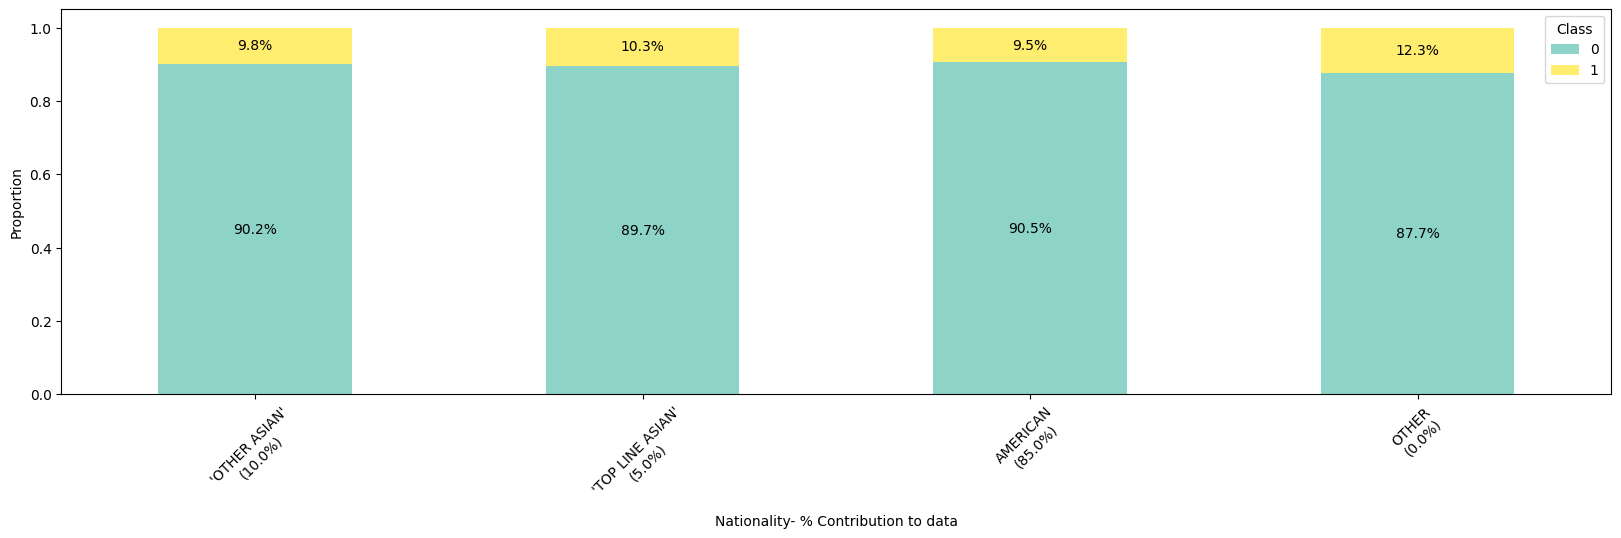

In [ ]:
make_plot('Nationality', 20, 5)

As observed in the above graph, the Nationality column does not give any information w.r.t. Class. The distribution percentage does not vary across the different categories. Also, about 85% of the column has 'American' category. Hence, the 'Nationality' column seems redundant to the dataset and can be removed.

In [ ]:
kick_df.drop(columns = ['Nationality'], inplace = True)
cat_list, num_list = update_list(kick_df,cat_list,num_list)

['Nationality'] has been removed from cat_list
[] has been removed from num_list


#### Exploring other categorical variables

##### 1. Auction Vs Class

The column Auction gives information about 'Auction provider at which the vehicle was purchased'. Here, we are trying to understand if 'Auction' adds any additional value for the model building or not.

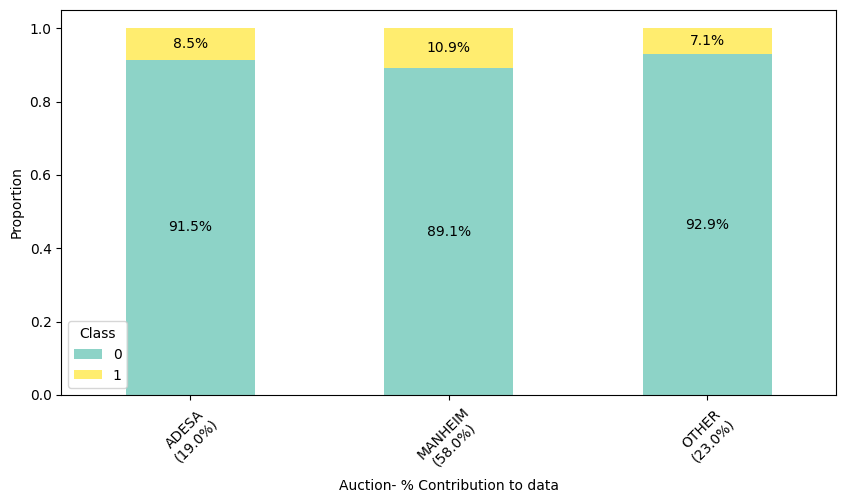

In [ ]:
make_plot('Auction', 10, 5)

As we can observe on the above graph, Class 1 varies across the different categories. It seems this variable would provide variation to the dataset and hence should not be removed.

##### 2. Make Vs Class

The Make column gives information about - Vehicle Manufacturer. Here, we are trying to understand if 'Make' adds any additional value for the model building or not.

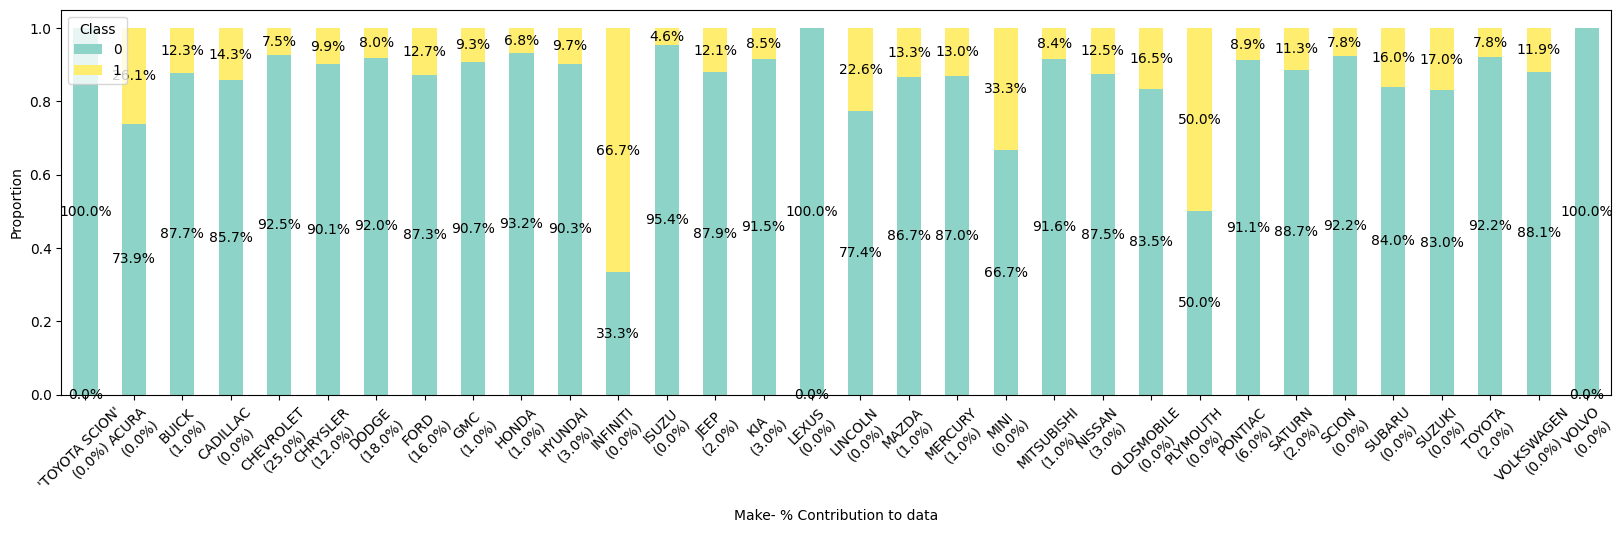

In [ ]:
make_plot('Make', 20, 5)

As we can observe in the above graph, the distribution of Classes 0 and 1 varies highly across different Make categories. Hence, this gives good information to the dataset and should be removed.

##### 3. Color Vs Class

The Color column gives information about - Vehicle Color. Here, we are trying to understand if 'Color' adds any additional value for the model building or not.

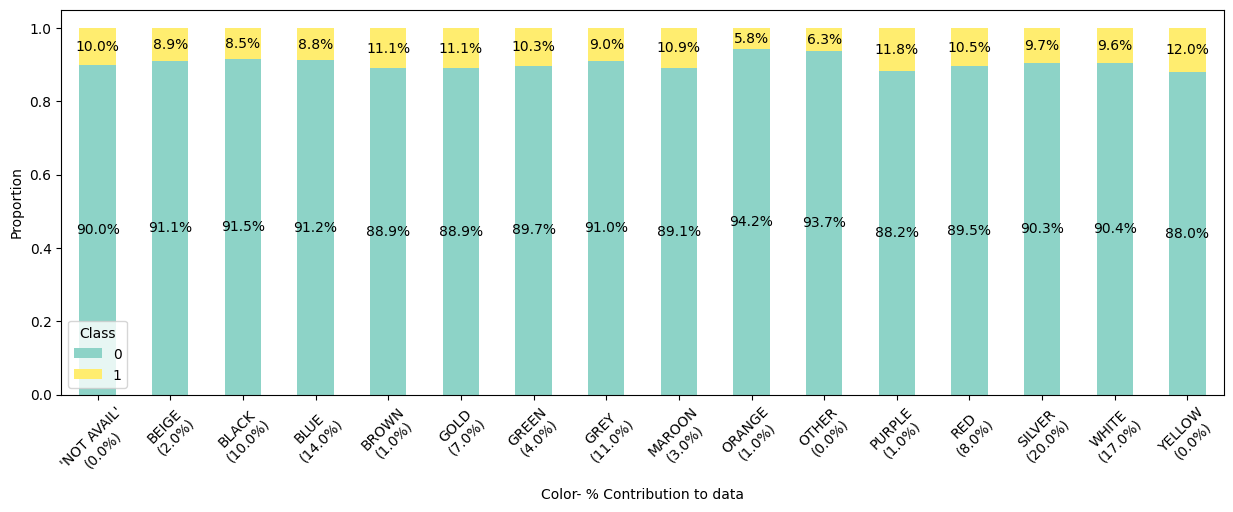

In [ ]:
make_plot('Color', 15, 5)

From the above graph, we cannot definitley say if the variable is not important. The Distribution of class varies slightly across the color categories. Hence, it does not give strong indication whether we should remove the variable or not.

##### 4. Transmission Vs Class

The Transmission column gives information about Vehicles transmission type (Automatic, Manual). Here, we are trying to understand if 'Transmission' adds any additional value for the model building or not.

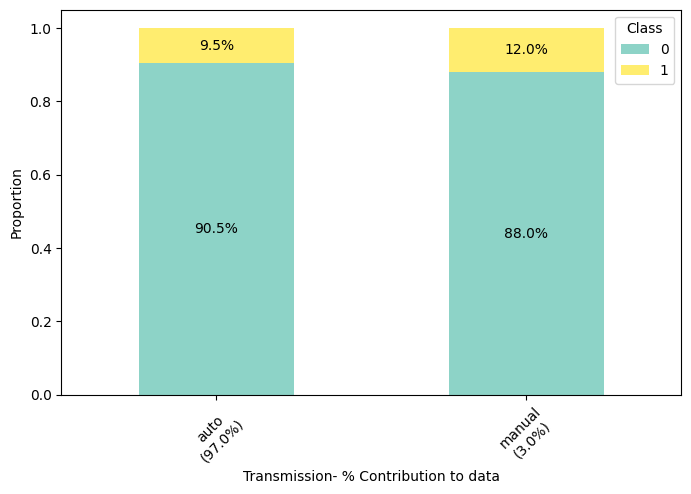

In [ ]:
make_plot('Transmission', 8, 5)

From the above graph, we can observe that Class 1, 0 distribution % does not vary much across the categories. Also, it seems that almost 97% of the column has 'Auto' transmission type. Hence, we can consider removing this variable, while building the model.

##### 5. WheelType Vs Class

The WheelType column gives informatio about vehicle wheel type description (Alloy, Covers, Special) etc. Here, we are trying to understand if 'WheelType' adds any additional value for the model building or not.

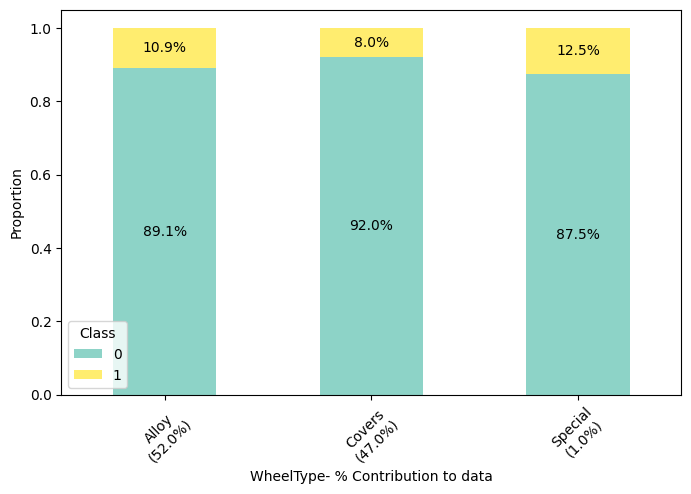

In [ ]:
make_plot('WheelType', 8, 5)

From the above graph, we cannot definitley say if the variable is not important. The Distribution of class varies slightly across the color categories. The catgeories Alloy and Covers cover almost 99% of the column.
Since, we donot have sufficient information, we should further explore this variable.

##### 6. Size Vs Class

The Size column gives information about the category of the vehicle (Compact, SUV, etc.). Here, we are trying to understand if 'Size' adds any additional value for the model building or not.

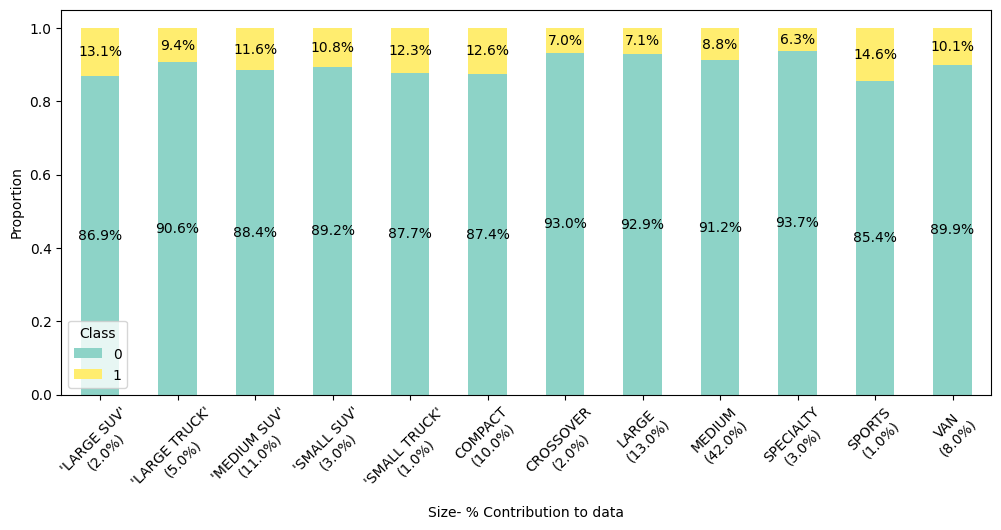

In [ ]:
make_plot('Size', 12, 5)

From the above graph, we cannot definitly say if the variable is not important. The Distribution of class varies slightly across the color categories. The catgeories Alloy and Covers cover almost 99% of the column.
However, we are not confident if we should remove the variable or not from the graph alone

##### 7. TopThreeAmericanName Vs Class

The TopThreeAmericanName column gives information about if the manufacturer is one of the top three American manufacturers i,e, (Chrysler, Ford, GM, Other). Here, we are trying to understand if 'TopThreeAmericanName' adds any additional value for the model building or not.

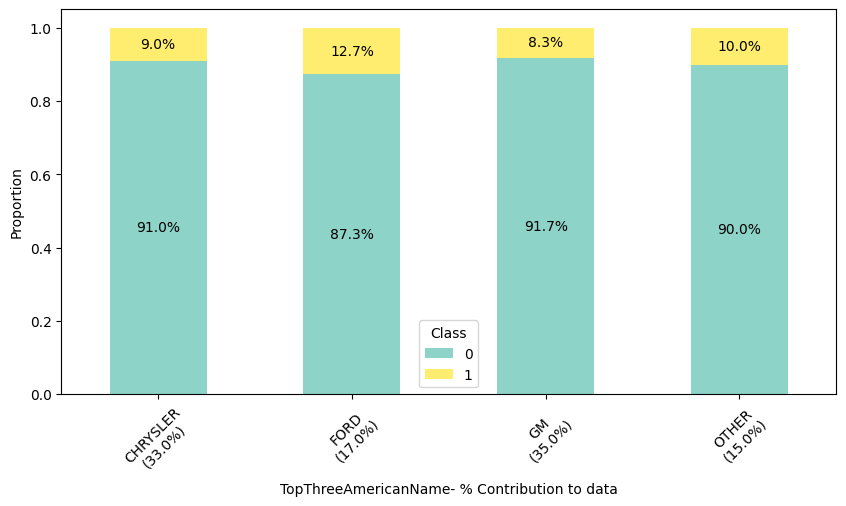

In [ ]:
make_plot('TopThreeAmericanName', 10, 5)

From the above graph, we can observe that the Class categories varies slighlty across 'TopThreeAmericanName''s categories. Hence, it may be an important variable and should not be removed

##### 8. IsOnlineSale Vs Class

The variable IsOnlineSale identifies if the vehicle was originally purchased online. Here, we are trying to understand if 'IsOnlineSale' adds any additional value for the model building or not.

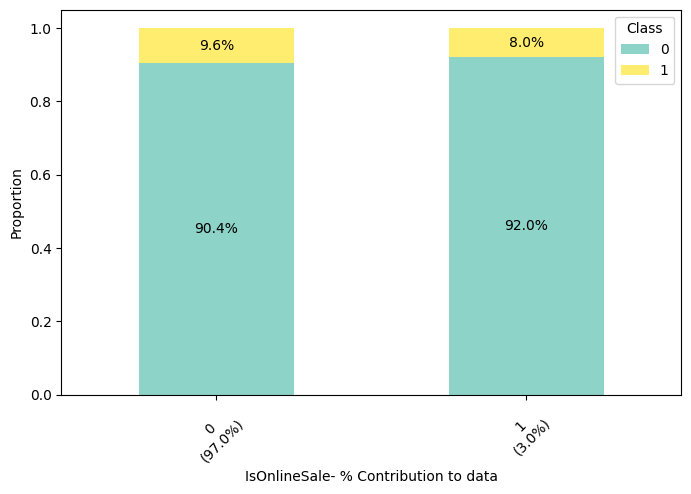

In [ ]:
make_plot('IsOnlineSale', 8, 5)

As observed from the graph above, 97% of the column has Class 0 and the proportion does not vary across the Classes. Hence, this indicates, we can consider dropping the variable.

##### 9. VNST Vs Class

The variable VNST identifies the State where the the car was purchased. Here, we are trying to understand if 'VNST' adds any additional value for the model building or not.

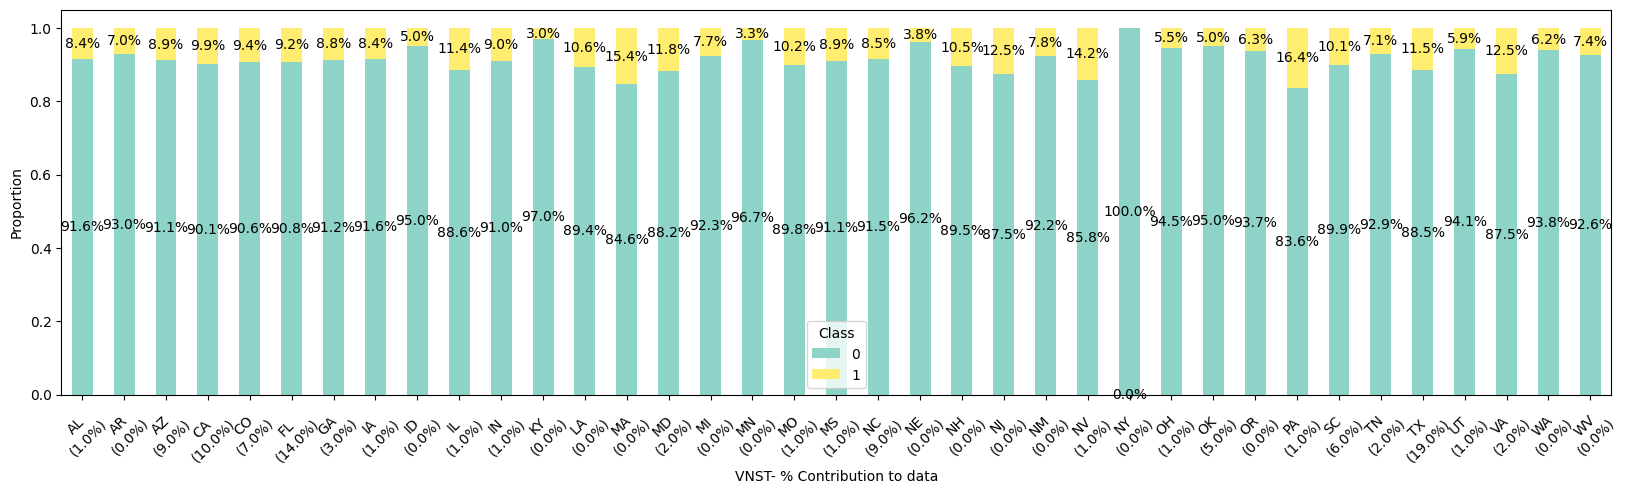

In [ ]:
make_plot('VNST', 20, 5)

As we can observe in the above graph, the distribution of Classes 0 and 1 varies highly across different states categories. Hence, this gives good information to the dataset and should not be removed.

#### Investigating Numerical variables

In this section, we are investigating numerical variables. Using Box plot we want to understand which variables have significant distribution pattern difference across the Classes (0,1). With the correlation heatmap, we are trying to identify correlated variables which we need to take care of while building machine learning models.

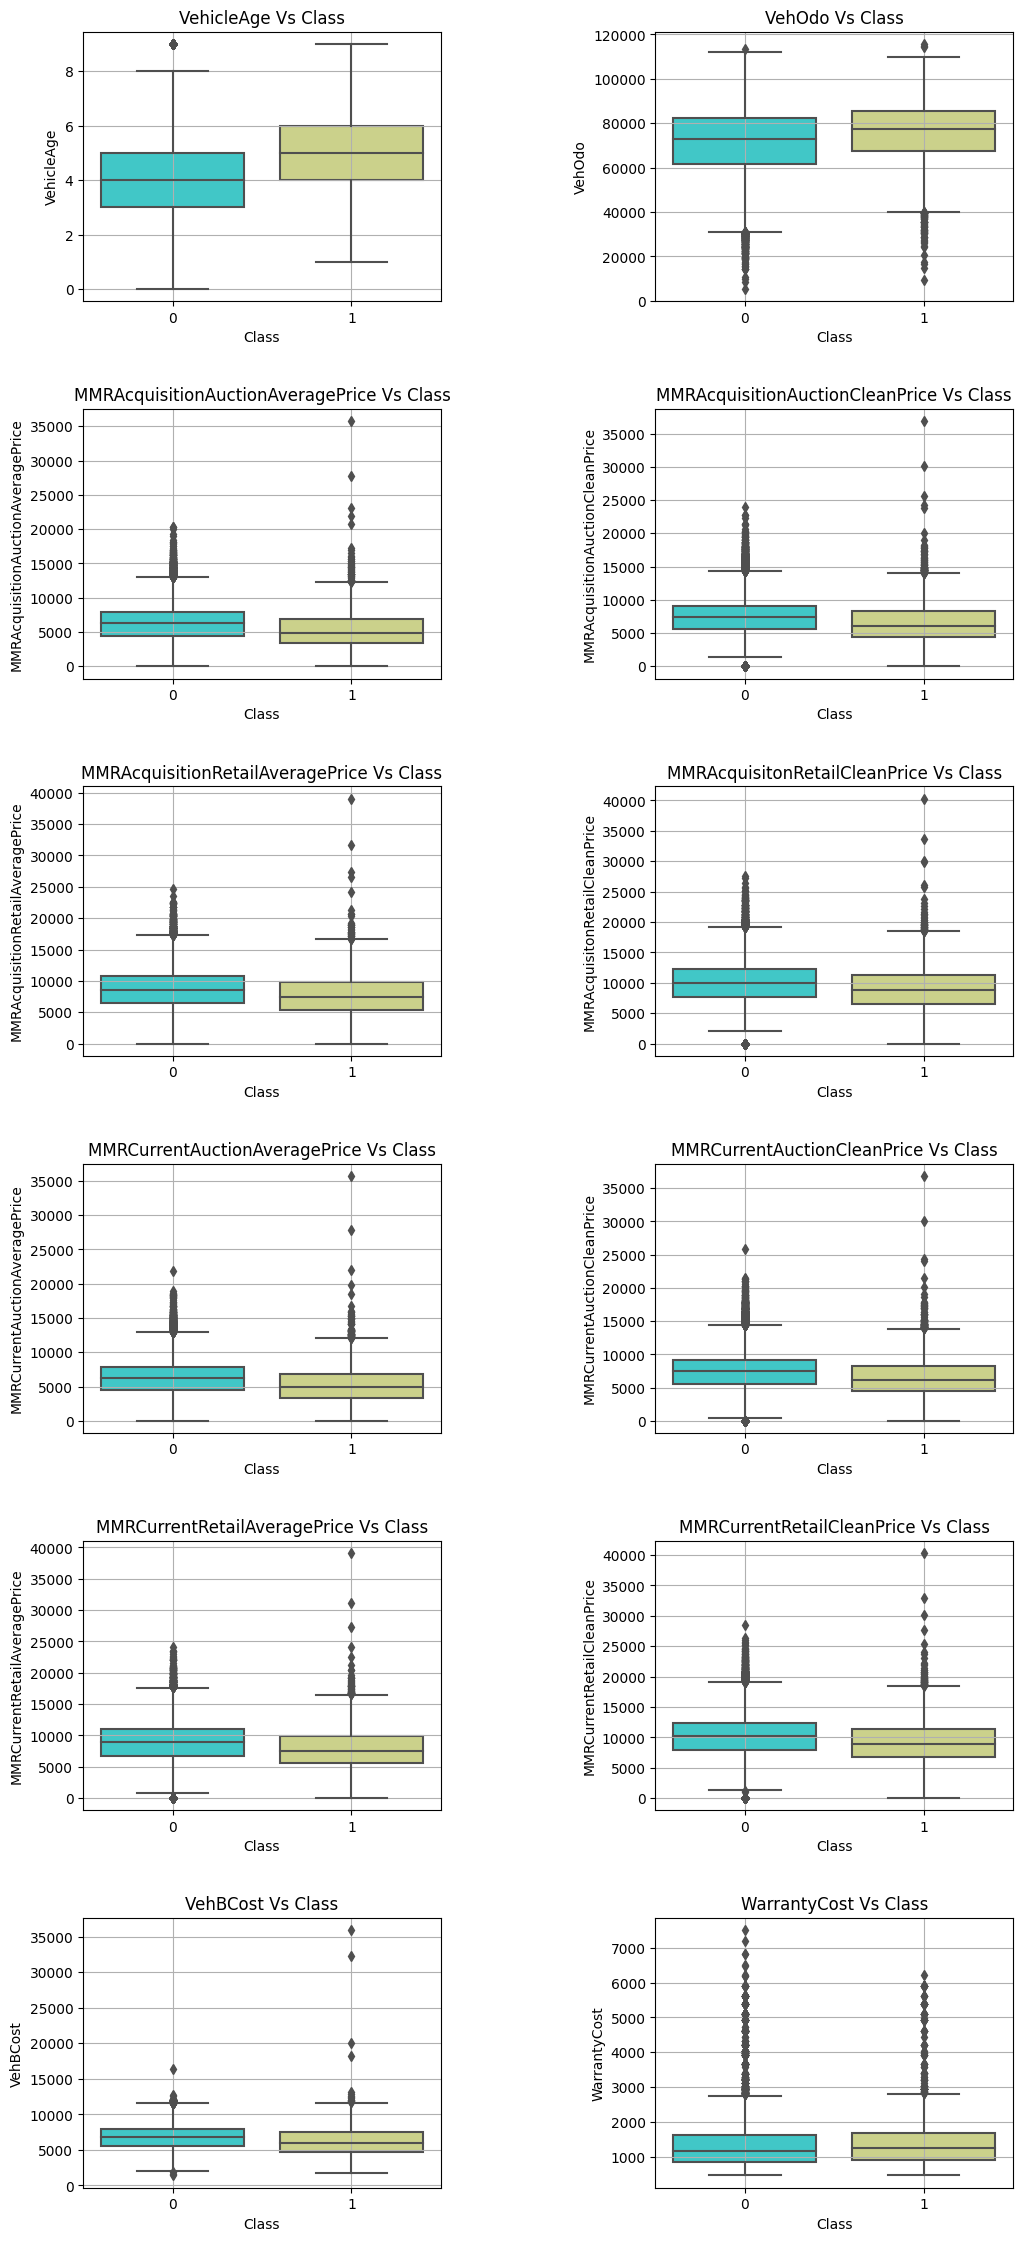

In [ ]:
# plotting boxplot of each class wrt each features
plt.figure(figsize = (12,28))
for i,col in enumerate(list(kick_df[num_list])):
    plt.subplot(6,2,i+1)
    plt.subplots_adjust(wspace=0.6,hspace=0.4)
    sns.boxplot(x='Class',y=col,data=kick_df, palette='rainbow')
    plt.title(col+" Vs Class")
    plt.grid()

From the above graphs, we can observe that, VehicleAge has significantly different distributions for Class 1 and Class 0 and hence indicates that this is an important variable for the analysis and model building. Rest of the variables 'MMRAcquisitionX' columns do not depict different distributions w.r.t to Class variables. 

<Axes: >

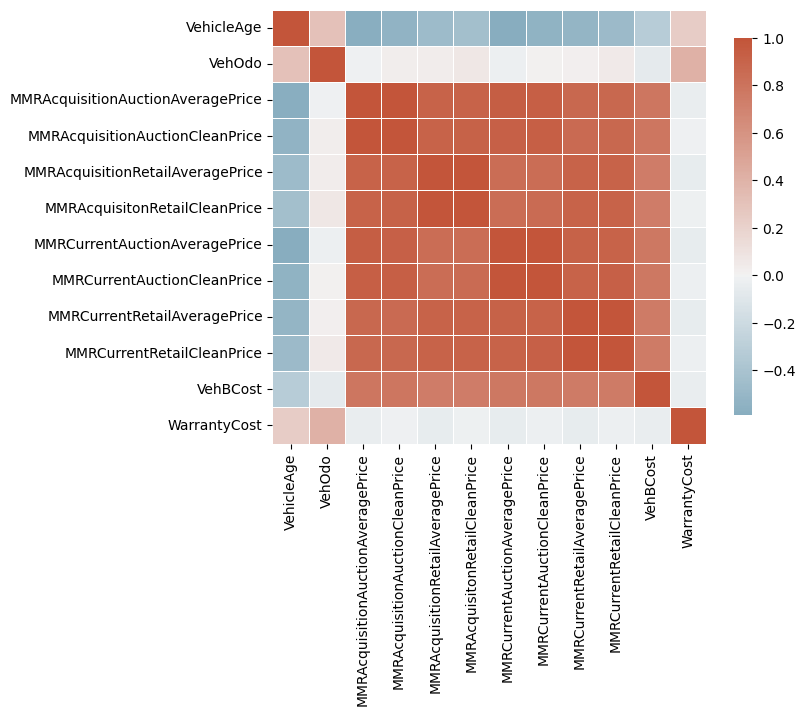

In [ ]:
# Compute the correlation matrix
corr = kick_df[num_list].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

From the above correlation map, we can observe that all MMRAcquisitionX columns are highly correlated with each other as well as with the VehBCost column. We need to take care of this very important insight as correlated variables may create issues for models such as Logistic Regression. In logistic regression, multicollinearity can lead to unstable coefficients, high standard errors, and reduced statistical significance of the model. This can also lead to overfitting, where the model is overly sensitive to the training data and does not generalize well to new data.

In [ ]:
def variable_stats(x):
    return pd.Series([x.count(), x.mean(), x.min(), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                      x.quantile(0.90),x.quantile(0.95),  1.5*(x.quantile(0.75)-x.quantile(0.25)) + x.quantile(0.75), x.max()], 
                  index=['Count', 'Mean', 'Minimum','P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95', '1.5IQR + Q3', 'Max'])

percentile_stats = kick_df[num_list].apply(lambda x: variable_stats(x)).T
percentile_stats

,Count,Mean,Minimum,P5,P10,P25,P50,P75,P90,P95,1.5IQR + Q3,Max
VehicleAge,67211.0,4.168588,0.0,2.0,2.0,3.0,4.0,5.0,7.0,7.0,8.00,9.0
VehOdo,67211.0,71734.558971,5368.0,45960.5,50902.0,62163.0,73530.0,82530.0,88827.0,92569.0,113080.50,115717.0
MMRAcquisitionAuctionAveragePrice,67211.0,6162.054589,0.0,2583.5,3087.0,4311.0,6163.0,7806.0,9212.0,10271.0,13048.50,35722.0
MMRAcquisitionAuctionCleanPrice,67211.0,7411.975123,0.0,3501.0,4089.0,5456.5,7380.0,9049.0,10894.0,12061.0,14437.75,36859.0
MMRAcquisitionRetailAveragePrice,67211.0,8538.503787,0.0,3617.0,4493.0,6319.0,8498.0,10709.5,12502.0,13775.0,17295.25,39080.0
MMRAcquisitonRetailCleanPrice,67211.0,9895.922423,0.0,4644.0,5666.0,7525.5,9868.0,12153.5,14114.0,15491.0,19095.50,40308.0
MMRCurrentAuctionAveragePrice,67211.0,6166.708827,0.0,2622.0,3103.0,4311.0,6130.0,7776.0,9194.0,10267.0,12973.50,35722.0
MMRCurrentAuctionCleanPrice,67211.0,7429.722307,0.0,3541.0,4118.0,5468.0,7390.0,9045.0,10870.0,12065.5,14410.50,36859.0
MMRCurrentRetailAveragePrice,67211.0,8817.942123,0.0,3908.0,4873.0,6565.0,8811.0,10972.0,12678.0,13882.0,17582.50,39080.0
MMRCurrentRetailCleanPrice,67211.0,10189.606300,0.0,4960.0,6017.0,7822.0,10175.0,12370.0,14325.0,15643.0,19192.00,40308.0


Above, we are looking for outlier detection. As observed from the above dataframe, columns like 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost' have outliers. 

#### Applying PCA on the numerical columns

From the above analysis, we have found that columns : ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost'] are correlated and also have outliers in few of the columns.   

With the help of PCA technique, we can transform the numerical columns into a new set of linearly uncorrelated variables called principal components. By reducing the number of correlated numerical columns using PCA, we can reduce the noise caused by outliers and improve the overall performance of your model. This is because PCA is able to capture the underlying structure of the data, which can help to reveal patterns and relationships that might not be apparent from the original data.

In [ ]:
process_df = kick_df.copy()

Here we are performing scaling of the numerical variables before applying PCA. We have observed in our assignments that if the variables are not scaled, then the variables with larger variance will dominate the PCA process, and the variables with smaller variance will be given less weight.

In [ ]:
scaler = StandardScaler()
process_df[num_list] = scaler.fit_transform(process_df[num_list])
process_df[num_list].head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
0,-0.098735,-1.374878,0.014247,-0.128911,0.338134,0.156642,-0.340228,-0.402768,-0.098796,-0.111210,-0.145794,-0.333191
1,-0.098735,1.208888,-1.008638,-0.968363,-1.285801,-1.249974,-1.021336,-0.988221,-1.404454,-1.368506,-1.763046,-0.511062
2,-0.684390,-0.032220,0.299627,0.381980,-0.186903,-0.080060,0.288962,0.417911,-0.291891,-0.138135,0.238447,1.200293
3,-1.270046,0.806515,0.699567,0.557311,1.009648,0.924962,0.673399,0.475784,1.029317,0.820266,0.525194,1.507680
4,-1.270046,-0.906126,1.075454,0.986799,0.464637,0.443875,0.489628,0.415670,-0.121475,-0.140253,0.235580,0.381744


In the following code, we are segregating columns that we need to apply the PCA on and applying PCA. Here, our goal is to reduce the number of columns and hence we have chosen num_components = 2. We would like to use the principal components that give maximum variance from the chosen columns.

In [ ]:
PCA_cols = [col for col in process_df if col.startswith('MMR')]
PCA_cols.append('VehBCost')
pcs = PCA(n_components=2)
pcs.fit(process_df[PCA_cols].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2
Standard deviation,2.8339,0.5930
Proportion of variance,0.8923,0.0391
Cumulative proportion,0.8923,0.9314


It is important that a small number of principal components could explain a large proportion of the total variance. As we can observe above, about 90% of the total variance is being explained by the first component alone.

In [ ]:
pca_df = pd.DataFrame(pcs.transform(process_df[PCA_cols]), columns=['PC1', 'PC2'])
process_df['PC1'] = pca_df['PC1']
process_df['PC2'] = pca_df['PC2']
process_df.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,Color,Transmission,WheelType,Size,TopThreeAmericanName,VNST,IsOnlineSale,Class,PC1,PC2
0,-0.098735,-1.374878,0.014247,-0.128911,0.338134,0.156642,-0.340228,-0.402768,-0.098796,-0.111210,...,SILVER,auto,Covers,MEDIUM,CHRYSLER,FL,0,0,-0.238565,-0.300776
1,-0.098735,1.208888,-1.008638,-0.968363,-1.285801,-1.249974,-1.021336,-0.988221,-1.404454,-1.368506,...,SILVER,auto,Covers,MEDIUM,FORD,TX,0,0,-3.657488,-0.436621
2,-0.684390,-0.032220,0.299627,0.381980,-0.186903,-0.080060,0.288962,0.417911,-0.291891,-0.138135,...,RED,auto,Alloy,LARGE,GM,CO,0,0,0.306928,0.456466
3,-1.270046,0.806515,0.699567,0.557311,1.009648,0.924962,0.673399,0.475784,1.029317,0.820266,...,BLACK,auto,Covers,LARGE,GM,CA,0,0,2.243997,-0.351718
4,-1.270046,-0.906126,1.075454,0.986799,0.464637,0.443875,0.489628,0.415670,-0.121475,-0.140253,...,WHITE,auto,Alloy,LARGE,GM,TX,0,0,1.293918,0.140205


In [ ]:
## Updating new copy lists and removing original variables that were converted into Principal components
cat_pca = cat_list
num_pca = num_list
process_df.drop(columns = PCA_cols, inplace = True)
cat_pca, num_pca = update_list(process_df,cat_pca,num_pca)

[] has been removed from cat_list
['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost'] has been removed from num_list


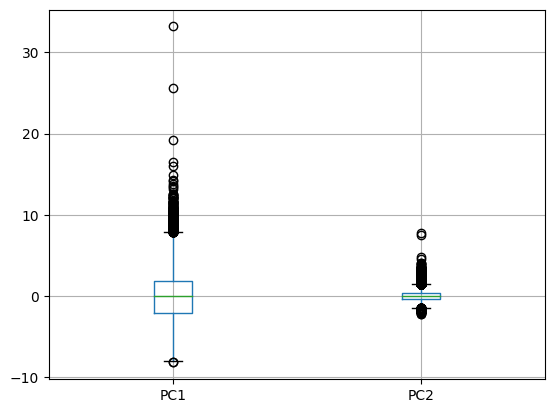

In [ ]:
boxplot = process_df.boxplot(column=['PC1', 'PC2'])  

In [ ]:
num_new = [col for col in process_df.columns if dict(process_df.dtypes)[col] not in ['object']]
num_new.remove('Class')
num_new.remove('IsOnlineSale')
cat_new = [col for col in process_df.columns if col not in num_new]
process_df.drop(columns = ['PC2'], inplace = True)
cat_new,num_new = update_list(process_df,cat_new,num_new)


[] has been removed from cat_list
['PC2'] has been removed from num_list


In [ ]:
process_df.head()

,VehicleAge,VehOdo,WarrantyCost,Auction,Make,Color,Transmission,WheelType,Size,TopThreeAmericanName,VNST,IsOnlineSale,Class,PC1
0,-0.098735,-1.374878,-0.333191,MANHEIM,DODGE,SILVER,auto,Covers,MEDIUM,CHRYSLER,FL,0,0,-0.238565
1,-0.098735,1.208888,-0.511062,ADESA,FORD,SILVER,auto,Covers,MEDIUM,FORD,TX,0,0,-3.657488
2,-0.684390,-0.032220,1.200293,MANHEIM,PONTIAC,RED,auto,Alloy,LARGE,GM,CO,0,0,0.306928
3,-1.270046,0.806515,1.507680,MANHEIM,CHEVROLET,BLACK,auto,Covers,LARGE,GM,CA,0,0,2.243997
4,-1.270046,-0.906126,0.381744,ADESA,CHEVROLET,WHITE,auto,Alloy,LARGE,GM,TX,0,0,1.293918


## 2. Model Exploration, Selection and Evaluation

In this section, we are building a model pipeline based on different criterias : 
1. Baseline - without any sampling technique
2. Oversampling - using SMOTE to oversample the minority class
2. Undersampling - undersampling the majority class


We have used the following modelling techniques :
1. Logistic Regression:

This model that accounts for target class probability. Benefit: interpretable and computationally efficient. Having trouble when the decision boundary is highly non-linear is a drawback.

2. Decision Tree Classifier :

This is a non-parametric classification model that divides the feature space according to the input features' values. Advantage: Captures interactions between features and non-linear decision boundaries. disadvantage: may be unstable to minor changes in the data and prone to overfitting.

3. Random Forest classifier :
A classification decion tree-based model that averages the predictions from various decision trees to combine them. Advantage: Compared to a single decision tree, it can handle high-dimensional data and is less prone to overfitting. Cons: For large datasets, it may be computationally expensive.

4. KNeighborsClassifier:

A non-parametric classification model where a data point's label is determined by the class of its closest neighbors. Benefit: Easy to implement and capable of capturing intricate decision boundaries. It can be computationally expensive for large datasets and is dependent on the distance metric selected.

5. XGBoost Classifier

A gradient-boosting method that combines several decision trees to produce highly accurate predictions. Advantage: can capture non-linear interactions between features and handles missing data. Advantage: if hyperparameters are not properly tuned, it can be computationally expensive and prone to overfitting.

6. LGBMClassifier

A gradient boosting algorithm that boosts training speed and memory consumption by employing a histogram-based strategy. An advantage is that it is quick and effective for large datasets with many dimensions of features. A disadvantage of this method is that it might struggle to handle complex data structures or feature interactions.



In [ ]:
data = process_df.copy()

In [ ]:
X = data.copy()
X.drop(columns = ['Class'], inplace = True)
X = pd.get_dummies(X, drop_first=True)

y = data[['Class']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# select categorical columns
categorical_cols = list(data.select_dtypes(include=['object']).columns)


['Auction',
 'Make',
 'Color',
 'Transmission',
 'WheelType',
 'Size',
 'TopThreeAmericanName',
 'VNST']

#### Building Baseline models

In this step, we are building simple baseline models that will serve as a starting point for comparison with more complex models. By comparing the performance of more complex models with the performance of the baseline model, we want to determine whether the additional complexity is justified and whether the model is actually improving performance.

In this step, we are building a pipeline for different models such as Logistic Regression, KNN, Decision Tree, Random Forest, XgBoost and LightGBM that we want to start with as baseline models. These models have been built without oversampling technique as we want to determine which model is performing best under baseline conditions. Further optimizations will include oversampling/undersampling techniques

In [ ]:
def model_pipeline(X_train, X_test, y_train, y_test):
    # initialize different classifiers
    lr = LogisticRegression(random_state=42,n_jobs=-1)
    dt = DecisionTreeClassifier(random_state=42)
    rf = RandomForestClassifier(random_state=42,n_jobs=-1)
    knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
    xgb_clf = xgb.XGBClassifier(random_state=42,n_jobs=-1)
    lgb_clf = lgb.LGBMClassifier(random_state=42,n_jobs=-1)

    # create a dictionary of classifiers
    classifiers = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, \
                   'KNN': knn, 'XGBoost': xgb_clf, 'LightGBM': lgb_clf}

    # initialize results dictionary
    results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC': []}
    results_test = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC': []}

    def metrics(results,y_actual,preds):
      # append results to dictionary
        results['Model'].append(name)
        results['Accuracy'].append(accuracy_score(y_actual, preds))
        results['Precision'].append(classification_report(y_actual, preds, output_dict=True)['1']['precision'])
        results['Recall'].append(classification_report(y_actual, preds, output_dict=True)['1']['recall'])
        results['F1-Score'].append(classification_report(y_actual, preds, output_dict=True)['1']['f1-score'])
        results['AUC'].append(roc_auc_score(y_actual, preds))

        return results;

    # iterate through each classifier and fit on the training data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        preds_train = clf.predict(X_train)
        preds_test = clf.predict(X_test)

        results_train = metrics(results_train, y_train, preds_train)
        results_test = metrics(results_test, y_test, preds_test)

    # create a pandas dataframe from results dictionary
    results_df_train = pd.DataFrame.from_dict(results_train)
    results_df_test = pd.DataFrame.from_dict(results_test)

    print("---------------------------------------------------------------------------------------------")
    print("TEST DATA Model wise performance evaluation using confusion_matrix and classification report")
    print("---------------------------------------------------------------------------------------------\n")

    
    # calculate confusion matrix and classification report for each algorithm
    for name, clf in classifiers.items():
        # set x-axis label and ticks. 
        print(name, '\n')
        preds = clf.predict(X_test)
        fig, ax = plt.subplots(figsize=(3,2), dpi=100)
        ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', )
        ax.set_xlabel("Predicted", labelpad=10)

        # set y-axis label and ticks
        ax.set_ylabel("Actual", labelpad=10)
        print(plt.show(), '\n', classification_report(y_test, preds))
        print("----------------------------------------------------------\n")

    return results_df_train, results_df_test

---------------------------------------------------------------------------------------------
TEST DATA Model wise performance evaluation using confusion_matrix and classification report
---------------------------------------------------------------------------------------------

Logistic Regression 



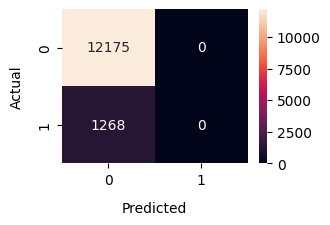

None 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12175
           1       0.00      0.00      0.00      1268

    accuracy                           0.91     13443
   macro avg       0.45      0.50      0.48     13443
weighted avg       0.82      0.91      0.86     13443

----------------------------------------------------------

Decision Tree 



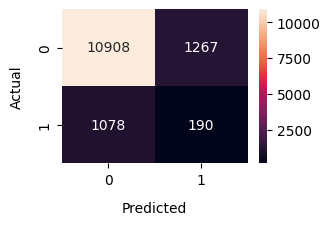

None 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     12175
           1       0.13      0.15      0.14      1268

    accuracy                           0.83     13443
   macro avg       0.52      0.52      0.52     13443
weighted avg       0.84      0.83      0.83     13443

----------------------------------------------------------

Random Forest 



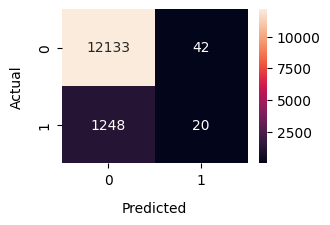

None 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12175
           1       0.32      0.02      0.03      1268

    accuracy                           0.90     13443
   macro avg       0.61      0.51      0.49     13443
weighted avg       0.85      0.90      0.86     13443

----------------------------------------------------------

KNN 



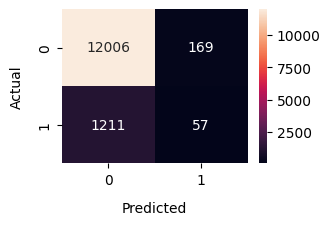

None 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     12175
           1       0.25      0.04      0.08      1268

    accuracy                           0.90     13443
   macro avg       0.58      0.52      0.51     13443
weighted avg       0.85      0.90      0.86     13443

----------------------------------------------------------

XGBoost 



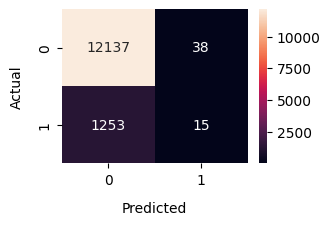

None 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12175
           1       0.28      0.01      0.02      1268

    accuracy                           0.90     13443
   macro avg       0.59      0.50      0.49     13443
weighted avg       0.85      0.90      0.86     13443

----------------------------------------------------------

LightGBM 



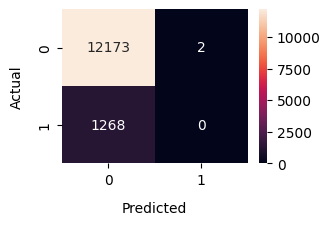

None 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     12175
           1       0.00      0.00      0.00      1268

    accuracy                           0.91     13443
   macro avg       0.45      0.50      0.48     13443
weighted avg       0.82      0.91      0.86     13443

----------------------------------------------------------



In [ ]:
baseline_train, baseline_test = model_pipeline(X_train, X_test, y_train, y_test)

In [ ]:
baseline_train

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.904218,0.250000,0.000194,0.000388,0.500066
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,0.999907,1.000000,0.999029,0.999514,0.999514
3,KNN,0.909556,0.668241,0.109946,0.188824,0.552083
4,XGBoost,0.910411,0.961003,0.067016,0.125295,0.533364
5,LightGBM,0.904832,0.918919,0.006605,0.013115,0.503271


In [ ]:
baseline_test

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.905676,0.000000,0.000000,0.000000,0.500000
1,Decision Tree,0.825560,0.130405,0.149842,0.139450,0.522888
2,Random Forest,0.904039,0.322581,0.015773,0.030075,0.506162
3,KNN,0.897344,0.252212,0.044953,0.076305,0.515536
4,XGBoost,0.903965,0.283019,0.011830,0.022710,0.504354
5,LightGBM,0.905527,0.000000,0.000000,0.000000,0.499918


Comparing our core metric - 'F1- Score' across Training and Test baseline models, we observe that Decision Tree, Random Forest models are extremely overfitting. Logistic and LightGBM are classifying all minority classes as 0. Here, we do not have a high accuracy (due to imbalance size of the classes) but are unable to classify Class 1 appropriately. Our goal is to minimize False positive (maximizing Precision) and False negatives (maximizing Recall). Since there always exists a trade-off between Precison and Recall, our primary focus would be to look at F1 Score. 
Here, we can observe that almost all models except Decision Tree have negligible F1 Score.

#### Oversampling SMOTE models

In machine learning, working with imbalanced datasets poses a significant challenge, as the minority class is often ignored by most techniques, leading to poor performance on this crucial class. However, the performance on the minority class is usually the most critical aspect of the model. To overcome this challenge, data augmentation techniques can be employed, specifically the Synthetic Minority Oversampling Technique (SMOTE). SMOTE generates new synthetic samples for the minority class by selecting examples that are close in the feature space and drawing new samples along the line connecting them. This approach has been shown to improve the performance of imbalanced classification models.

Text(0.5, 1.0, 'Oversampled train data w.r.t Classes')

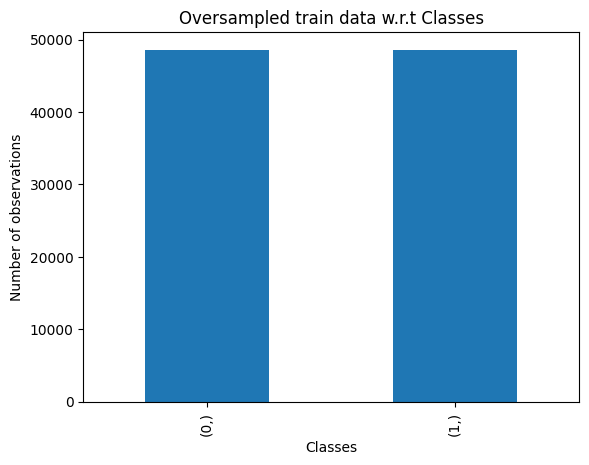

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

y_train_resampled.value_counts().plot(kind= 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of observations')
plt.title("Oversampled train data w.r.t Classes")

---------------------------------------------------------------------------------------------
TEST DATA Model wise performance evaluation using confusion_matrix and classification report
---------------------------------------------------------------------------------------------

Logistic Regression 



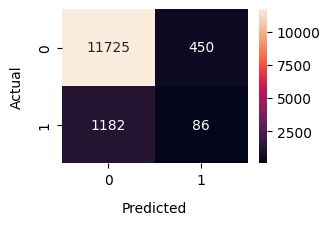

None 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12175
           1       0.16      0.07      0.10      1268

    accuracy                           0.88     13443
   macro avg       0.53      0.52      0.52     13443
weighted avg       0.84      0.88      0.86     13443

----------------------------------------------------------

Decision Tree 



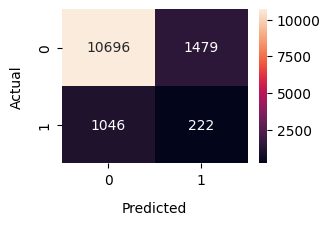

None 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89     12175
           1       0.13      0.18      0.15      1268

    accuracy                           0.81     13443
   macro avg       0.52      0.53      0.52     13443
weighted avg       0.84      0.81      0.82     13443

----------------------------------------------------------

Random Forest 



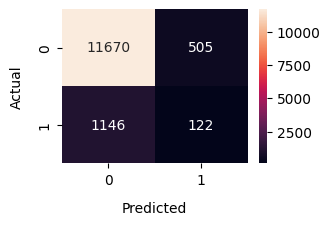

None 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12175
           1       0.19      0.10      0.13      1268

    accuracy                           0.88     13443
   macro avg       0.55      0.53      0.53     13443
weighted avg       0.84      0.88      0.86     13443

----------------------------------------------------------

KNN 



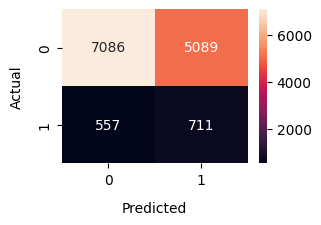

None 
               precision    recall  f1-score   support

           0       0.93      0.58      0.72     12175
           1       0.12      0.56      0.20      1268

    accuracy                           0.58     13443
   macro avg       0.52      0.57      0.46     13443
weighted avg       0.85      0.58      0.67     13443

----------------------------------------------------------

XGBoost 



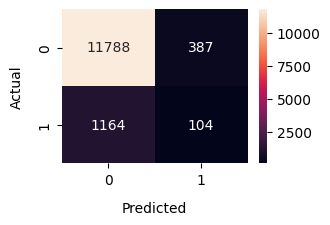

None 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12175
           1       0.21      0.08      0.12      1268

    accuracy                           0.88     13443
   macro avg       0.56      0.53      0.53     13443
weighted avg       0.84      0.88      0.86     13443

----------------------------------------------------------

LightGBM 



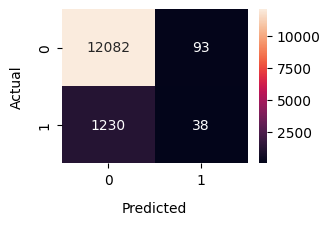

None 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     12175
           1       0.29      0.03      0.05      1268

    accuracy                           0.90     13443
   macro avg       0.60      0.51      0.50     13443
weighted avg       0.85      0.90      0.86     13443

----------------------------------------------------------



In [ ]:
smote_train, smote_test = model_pipeline(X_train_resampled, X_test, y_train_resampled, y_test)

In [ ]:
smote_train

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.889912,0.956356,0.817112,0.881268,0.889912
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNN,0.846174,0.767754,0.992616,0.865823,0.846174
4,XGBoost,0.924527,0.976367,0.870115,0.920184,0.924527
5,LightGBM,0.923139,0.991354,0.853723,0.917405,0.923139


In [ ]:
smote_test

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.878599,0.160448,0.067823,0.095344,0.515431
1,Decision Tree,0.812170,0.130511,0.175079,0.149545,0.526800
2,Random Forest,0.877185,0.194577,0.096215,0.128760,0.527368
3,KNN,0.580004,0.122586,0.560726,0.201188,0.571369
4,XGBoost,0.884624,0.211813,0.082019,0.118249,0.525116
5,LightGBM,0.901584,0.290076,0.029968,0.054325,0.511165


In conclusion, the analysis revealed that while Decision Tree and Random Forest models continue to demonstrate signs of overfitting, Logistic Regression, KNN, XGBoost, and LightGBM models performed well in terms of training data overfitting. The ultimate evaluation of the best model will depend on the F1 score on testing data. Based on this metric, the Decision Tree and KNN models performed well and are recommended as strong candidates for the final model for Oversampling Approach

#### Undersampling models

Under-sampling is a method used to address imbalanced datasets by reducing the size of the majority class while retaining all data from the minority class. Although this approach has drawbacks, such as the potential loss of valuable information, it effectively mitigates class imbalance.

Text(0.5, 1.0, 'Undersampled train data w.r.t Classes')

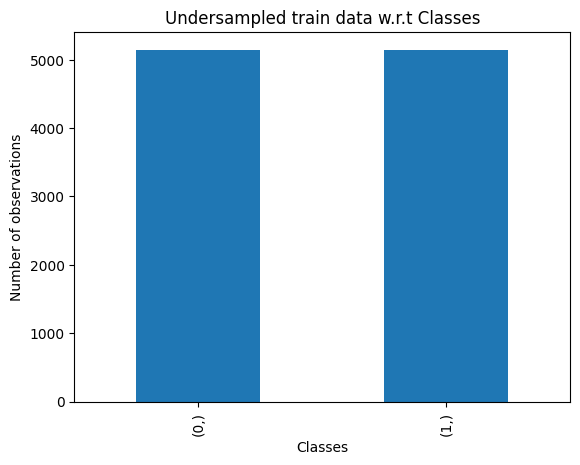

In [ ]:
us = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = us.fit_resample(X_train, y_train)

y_train_resampled.value_counts().plot(kind= 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of observations')
plt.title("Undersampled train data w.r.t Classes")

---------------------------------------------------------------------------------------------
TEST DATA Model wise performance evaluation using confusion_matrix and classification report
---------------------------------------------------------------------------------------------

Logistic Regression 



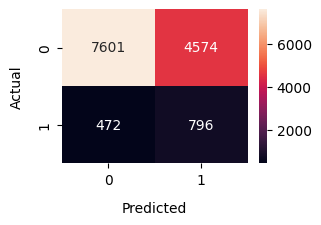

None 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75     12175
           1       0.15      0.63      0.24      1268

    accuracy                           0.62     13443
   macro avg       0.54      0.63      0.50     13443
weighted avg       0.87      0.62      0.70     13443

----------------------------------------------------------

Decision Tree 



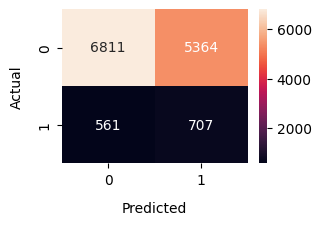

None 
               precision    recall  f1-score   support

           0       0.92      0.56      0.70     12175
           1       0.12      0.56      0.19      1268

    accuracy                           0.56     13443
   macro avg       0.52      0.56      0.44     13443
weighted avg       0.85      0.56      0.65     13443

----------------------------------------------------------

Random Forest 



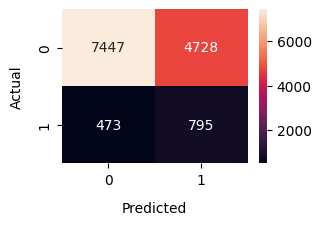

None 
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     12175
           1       0.14      0.63      0.23      1268

    accuracy                           0.61     13443
   macro avg       0.54      0.62      0.49     13443
weighted avg       0.87      0.61      0.69     13443

----------------------------------------------------------

KNN 



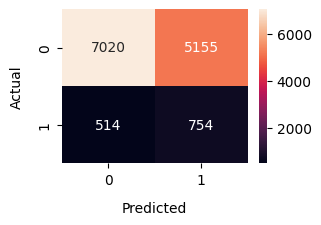

None 
               precision    recall  f1-score   support

           0       0.93      0.58      0.71     12175
           1       0.13      0.59      0.21      1268

    accuracy                           0.58     13443
   macro avg       0.53      0.59      0.46     13443
weighted avg       0.86      0.58      0.66     13443

----------------------------------------------------------

XGBoost 



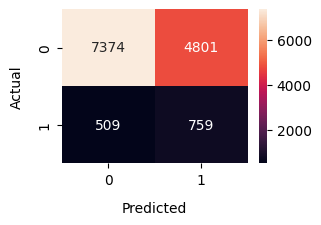

None 
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     12175
           1       0.14      0.60      0.22      1268

    accuracy                           0.60     13443
   macro avg       0.54      0.60      0.48     13443
weighted avg       0.86      0.60      0.69     13443

----------------------------------------------------------

LightGBM 



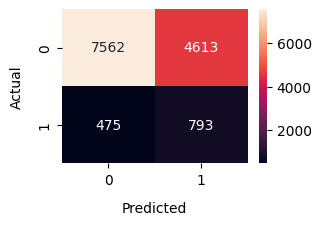

None 
               precision    recall  f1-score   support

           0       0.94      0.62      0.75     12175
           1       0.15      0.63      0.24      1268

    accuracy                           0.62     13443
   macro avg       0.54      0.62      0.49     13443
weighted avg       0.87      0.62      0.70     13443

----------------------------------------------------------



In [ ]:
undersample_train, undersample_test = model_pipeline(X_train_resampled, X_test, y_train_resampled, y_test)

In [ ]:
undersample_train

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.633547,0.635521,0.626263,0.630858,0.633547
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNN,0.738248,0.737832,0.739122,0.738476,0.738248
4,XGBoost,0.827700,0.829621,0.824786,0.827197,0.827700
5,LightGBM,0.750486,0.751905,0.747669,0.749781,0.750486


In [ ]:
undersample_test

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.624637,0.148231,0.627760,0.239831,0.626036
1,Decision Tree,0.559250,0.116455,0.557571,0.192669,0.558498
2,Random Forest,0.613107,0.143944,0.626972,0.234133,0.619317
3,KNN,0.578294,0.127602,0.594637,0.210116,0.585614
4,XGBoost,0.604999,0.136511,0.598580,0.222320,0.602124
5,LightGBM,0.621513,0.146689,0.625394,0.237639,0.623252


After performing undersampling, there was a significant improvement in accuracy for Logistic Regression, Random Forest, and XGBoost models. The most notable improvement was observed in the LightGBM model. Additionally, the f1 score for Decision Tree and KNN models also improved respectably. Overall, the undersampling approach yielded better results for all algorithms used on this dataset.

To further improve upon the performance of Logistic Regression, Random Forest, XGBoost, LightGBM we will perform Hyperparameter tuning

#### Hyper-parameter Tuning

Hyperparameters are machine learning algorithm settings or configuration options that cannot be learned directly from data. Instead, they must be manually configured by the user before the training process can begin.

We are using hyperparamter tuning to determine the best parameters with which we get the best performance of machine learning model. We are using Gridsearch as a popular hyperparameter tuning strategy that involves building a grid of all possible hyperparameter combinations, training a model for each combination, and picking the combination that produces the greatest performance.

We will be evaluating the models based on our core metric F1-Score.

1. Logistic Regression

In [ ]:
# initialize model parameters
params = {
'solver': ['lbfgs', 'liblinear'],
'penalty': ['l2','l1'],
'C': [100, 10, 1.0, 0.1, 0.01]
}

# Perform the hyperparameter tuning
lr = LogisticRegression(random_state=42,n_jobs=-1)
clf = GridSearchCV(lr, params, cv=3,scoring='f1',n_jobs=-1)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on the test set
print(clf.best_estimator_)
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
score = f1_score(y_test, y_pred)
print("Test F1-score: {:.3f}".format(score))

LogisticRegression(C=0.01, n_jobs=-1, penalty='l1', random_state=42,
                   solver='liblinear')
Test F1-score: 0.232


2. Random forest forest

In [ ]:
# Create the parameter grid
params = {'max_depth':[10,12,14,16],    
          'max_features':[2, 3, 4, 6, 8],
          'min_samples_split':[2, 3],
          'min_samples_leaf':[1, 2, 3]
          }

# Perform the hyperparameter tuning
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)
clf = GridSearchCV(rfc, params, cv=3,scoring='f1',n_jobs=-1)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on the test set
print(clf.best_estimator_)
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
score = f1_score(y_test, y_pred)
print("Test F1-score: {:.3f}".format(score))

RandomForestClassifier(max_depth=14, max_features=3, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)
Test F1-score: 0.236


3. LightGBM Classifier

In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state = 42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [20,50,75,100],
    'learning_rate': [0.01, 0.05, 1],
    'num_leaves': [20, 30, 50]
    }

#clf = GridSearchCV(lr, params, cv=5,scoring='f1',n_jobs=-1)

clf = GridSearchCV(lgb_clf, param_grid, cv=5, scoring='f1', n_jobs =-1)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on the validation set
print(clf.best_estimator_)
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
score = f1_score(y_test, y_pred)
print("Test F1-score: {:.3f}".format(score))  

LGBMClassifier(learning_rate=0.05, num_leaves=20, random_state=42)
Test F1-score: 0.242


Since F1 score of hyper parameter tuned LGBMClassifier is the most, that’s our model of choice.

#### F-1 Score model evaluation 

Since our goal is to minimize False positive (maximizing Precision) and False negatives (maximizing Recall) and there always exists a trade-off between Precison and Recall, our primary focus would be to look at F1 Score and compare it across the different sampling techniques explored above :Baseline, Oversampling, Undersampling

[Text(0.5, 1.0, 'F1-Score evaluation for different models across sampling techniques')]

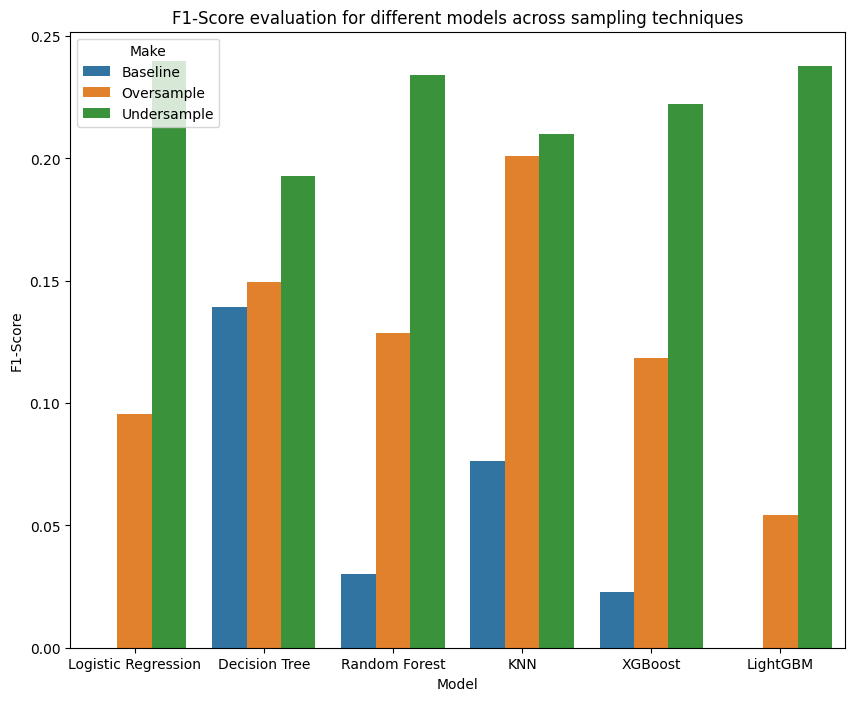

In [ ]:
base_line = baseline_test[['Model','F1-Score']]
base_line = base_line.rename(columns = {'F1-Score': 'Baseline'})

oversample = smote_test[['Model','F1-Score']]
oversample = oversample.rename(columns = {'F1-Score': 'Oversample'})

undersample = undersample_test[['Model','F1-Score']]
undersample = undersample.rename(columns = {'F1-Score': 'Undersample'})


evaluation_df = base_line.merge(oversample, left_on='Model', right_on='Model')
evaluation_df = evaluation_df.merge(undersample, left_on='Model', right_on='Model')


evaluation_df = pd.melt(evaluation_df, id_vars='Model', value_vars=['Baseline', 'Oversample', 'Undersample'])
evaluation_df = evaluation_df.rename(columns = {'variable': 'Make', 'value': 'F1-Score'})

plt.figure(figsize=(10,8))
sns.barplot(data= evaluation_df, x='Model', y='F1-Score', hue='Make').set(title='F1-Score evaluation for different models across sampling techniques')


From the above F1-Score graph,
*   We can observe that undersampling technique performs well across all models
*   We can also observe that now almost all the models have a comparable scores, this gives us a confidence that model is fitting well in this case as compared to baseline and SMOTE
* As we can see that the f1-score of Logistic Regression, Random forest and Lightgbm are good, thats why we decided to perform GridsearchCV above for thes algorithms to find the right hyperparameters that could possibly improve the performance.



It seems that the majority class had a lot of redundant examples that were not adding much information to the model, so removing some of these examples through undersampling helped the model focus on the more informative examples from the minority class. It's also possible that oversampling was leading to overfitting or that the minority class had enough informative examples to begin with, so duplicating examples did not improve performance.

## 3. Performance diagnostics and evaluation 

After analyzing the results, we have determined that the LGBMClassifier with hyperparameters learning_rate=0.05, num_leaves=20, and random_state=42 has the highest F1 score on the under-sampled data. Thus, we will train our hyperparameter-tuned LGBMClassifier on the under-sampled data and evaluate the final ROC curve.
 

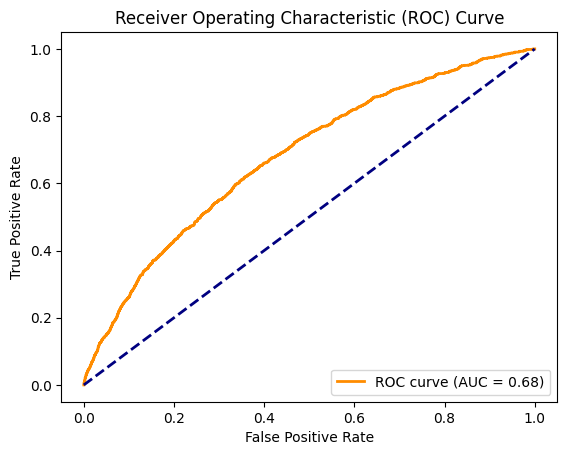

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(learning_rate=0.05, num_leaves=20, random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for validation set
y_val_pred = lgb_model.predict_proba(X_test)[:, 1]

# Calculate FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_val_pred)

# Calculate AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This curve shows that our hyperparameter-tuned LGBMClassifier is able to distinguish between the positive and negative classes 68% of the time, which is better than random guessing (50%).

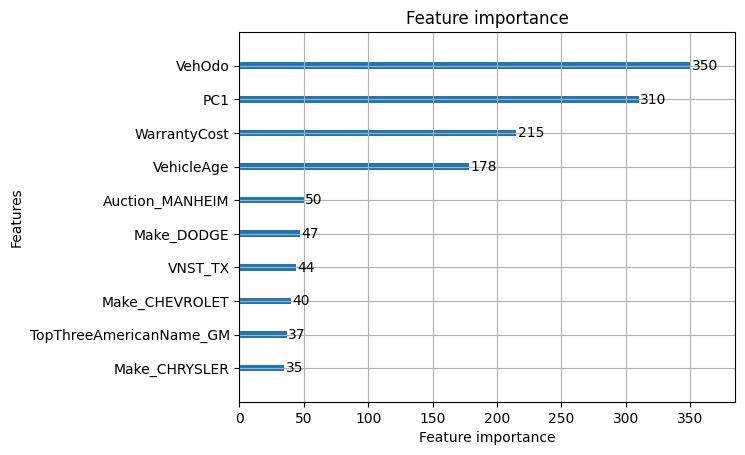

In [ ]:
lgb.plot_importance(lgb_model, max_num_features=10)
plt.show()

Our dataset contained 12 numerical and 13 categorical variables, out of which 8 numerical variables were highly correlated. Rather than dropping the correlated variables, we decided to create two principal components (PC1 and PC2) and kept the one with the highest variance, which turned out to be PC1. Interestingly, the newly created feature PC2 had the second-highest feature importance.

In [ ]:
def final_model(X_train, X_test, y_train, y_test):
    # initialize different classifiers
    lgb_clf = lgb.LGBMClassifier(learning_rate=0.05, num_leaves=20, random_state=42)

    # create a dictionary of classifiers
    classifiers = {'LightGBM': lgb_clf}

    # initialize results dictionary
    results_train = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC': []}
    results_test = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC': []}

    def metrics(results,y_actual,preds):
      # append results to dictionary
        results['Model'].append(name)
        results['Accuracy'].append(accuracy_score(y_actual, preds))
        results['Precision'].append(classification_report(y_actual, preds, output_dict=True)['1']['precision'])
        results['Recall'].append(classification_report(y_actual, preds, output_dict=True)['1']['recall'])
        results['F1-Score'].append(classification_report(y_actual, preds, output_dict=True)['1']['f1-score'])
        results['AUC'].append(roc_auc_score(y_actual, preds))

        return results;

    # iterate through each classifier and fit on the training data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        preds_train = clf.predict(X_train)
        preds_test = clf.predict(X_test)

        results_train = metrics(results_train, y_train, preds_train)
        results_test = metrics(results_test, y_test, preds_test)

    # create a pandas dataframe from results dictionary
    results_df_train = pd.DataFrame.from_dict(results_train)
    results_df_test = pd.DataFrame.from_dict(results_test)

    print("---------------------------------------------------------------------------------------------")
    print("Light GBM Model performance evaluation using confusion_matrix and classification report")
    print("---------------------------------------------------------------------------------------------\n")

    
    # calculate confusion matrix and classification report for each algorithm
    for name, clf in classifiers.items():
        # set x-axis label and ticks. 
        print(name, '\n')
        preds = clf.predict(X_test)
        fig, ax = plt.subplots(figsize=(3,2), dpi=100)
        ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', )
        ax.set_xlabel("Predicted", labelpad=10)

        # set y-axis label and ticks
        ax.set_ylabel("Actual", labelpad=10)
        print(plt.show(), '\n', classification_report(y_test, preds))
        print("----------------------------------------------------------\n")

    return results_df_train, results_df_test

---------------------------------------------------------------------------------------------
Light GBM Model performance evaluation using confusion_matrix and classification report
---------------------------------------------------------------------------------------------

LightGBM 



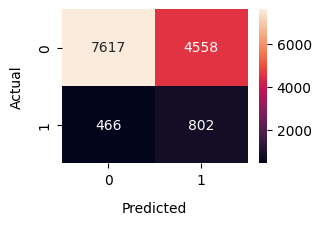

None 
               precision    recall  f1-score   support

           0       0.94      0.63      0.75     12175
           1       0.15      0.63      0.24      1268

    accuracy                           0.63     13443
   macro avg       0.55      0.63      0.50     13443
weighted avg       0.87      0.63      0.70     13443

----------------------------------------------------------



In [ ]:
train_gbm, test_gbm = final_model(X_train_resampled, X_test, y_train_resampled, y_test)

In [ ]:
test_gbm

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,LightGBM,0.626274,0.149627,0.632492,0.242004,0.629059


As we can see from the above final LightGBM model, we have improved a bit with hyperparameter tuning. However, there is no such major improvement from hyperparameter tuning of any of the algorithms. This also indicates that the data is somewhat random and doesn't have target class specific distribution or division that could help identify the classes with strong confidence. This is a very common issue that happens with the imbalance class problems.

Further interpreting the above metrics:

 * *Accuracy*: The accuracy is around 0.63 which is low, we could have got an accuracy of 90% like the way we saw for most of our baseline models. However, it would not help solve the purpose as all the classes will be identifies as '0'.

* *Precision*: We have a pretty low value of precision of just 0.15, this is because of the tradeoff between recall and precison. As we started focusing on to improve the recall score it also led to misclassification of class 0 and eventually reducing the precision score.

* *Recall* : Recall for class 1 is 0.63, which means that the model is able to correctly identify around 63% of all actual positive instances. We believe this score is good as in case of this problem statement we have our prime focus on identifying the possibility of the car being a liability, so we would not want to miss out on it and a good model would try to classify as many of positive class as possible.

* *F1-score*: As we have discussed earlier, f1-score is our primary metric and we do have a low score of just 0.24, but we still believe this score is good considering the nature of the dataset.

* *AUC*: The Area Under the Receiver Operating Characteristic (ROC) Curve, which is a measure of how well the model can distinguish between positive and negative instances. In this case, the AUC is around 0.63, which is slightly better than random guessing (AUC=0.5). However, given the how different models performed, we believe this AUC is fair enough.





*   Aditi Chadha
*   Aryan Deore
*   Insha Ahmad
*   Mahim Mittal